In [1]:

import pandas as pd
import numpy as np

# important libraries for plotting
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


#preprocessing
from statsmodels.tools.eval_measures import rmse

#  model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#  metrics and report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

#  ML algorithm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r'C:\Users\Owner\Downloads\Auto.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [7]:
df.nunique(axis=0, dropna=True)

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          350
acceleration     95
year             13
origin            3
name            304
dtype: int64

In [8]:
# Printing distinct observations over Number of cylinders
print(df['cylinders'].unique())
df['cylinders'].value_counts    

# Conclusion: There are 203 automobiles having 4 cylinders, 103 with 8 cylinders, 84 with 6 cylinders, 4 with 3 cylinders and only 3 automobiles with 5 cylinders. 

[8 4 6 3 5]


<bound method IndexOpsMixin.value_counts of 0      8
1      8
2      8
3      8
4      8
      ..
392    4
393    4
394    4
395    4
396    4
Name: cylinders, Length: 397, dtype: int64>

Text(0.5, 1.0, 'Pie chart showing percentage of automobiles based on origin')

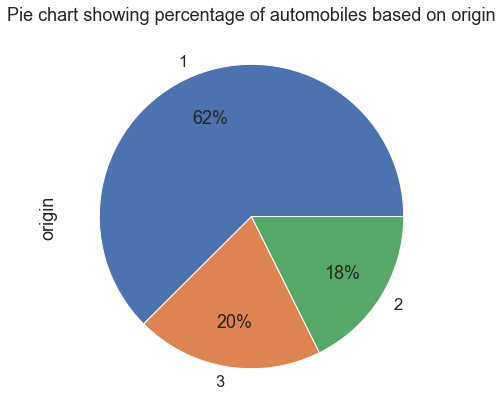

In [9]:
# Pie chart showing percentage of automobiles based on origin
f=df['origin'].value_counts()
dims=(10,7)
fig,ax=plt.subplots(figsize=dims)
f.plot.pie(autopct='%1.0f%%',pctdistance=0.7,labeldistance=1.1,)
plt.title('Pie chart showing percentage of automobiles based on origin')
          

In [10]:
#as horsepower contains '?' string...so calculating how many '?' values are there in horsepower column
df[df.horsepower == '?']

# Conclusion: There are 5 records having '?' values in hp column

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [11]:
# Replacing '?' values 
df.replace('?', np.NaN, inplace=True)
df['horsepower']=df['horsepower'].astype('float')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [12]:
# Replacing NaN values in hp column with 0.000 and checking the same
df.replace(np.NaN, 0.000, inplace=True)
df[df['horsepower']==0.000]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,0.0,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,0.0,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,0.0,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0.0,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0.0,2320,15.8,81,2,renault 18i


In [13]:
# As name column is not required for analysis ...so dropping it
df1=df.drop(['name'],axis=1)

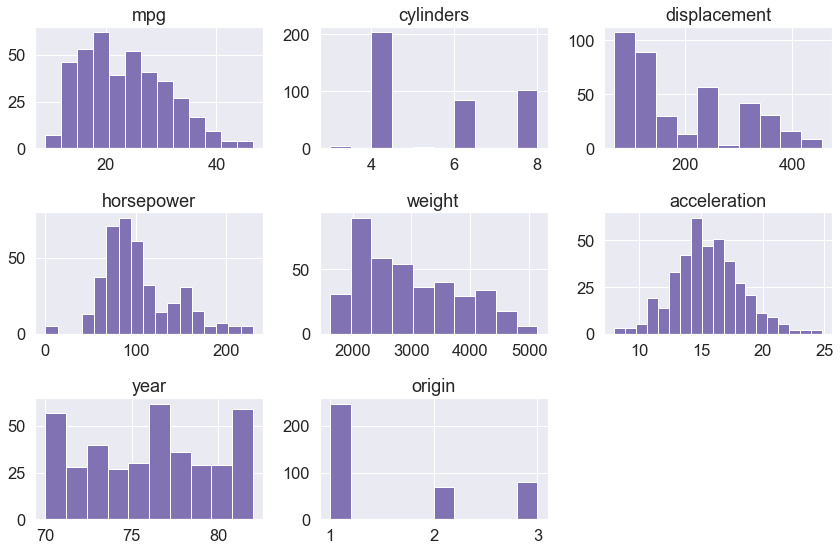

In [14]:
# Graphical representation of distribution of the features of the cars
df1.hist(figsize=(12,8), bins='auto' , color='m')
plt.tight_layout()
plt.show()

# Conclusion:
# Most of the automobiles have mpg in range of 15 to 35.
# Most of the automobiles have 4 cylinders.
# Most of the automobiles have displacement in range of 0 to 100.
# Most of the automobiles have horsepower in range of 50 to 100.
# Most of the automobiles have weight in range of 2000 to 3500.
# Most of the automobiles have acceleration of 15 meter per second squared.

# central tendency

In [15]:
# Describing the  statistical summary of given dataset 
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,103.153652,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,39.986602,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [16]:
# Finding the Mean of processed data
df1.mean()

# Conclusion: Average point of each column is shown below, where mpg has avg. value of 23.51, displacement has avg. value of 193.53 and so on..

mpg               23.515869
cylinders          5.458438
displacement     193.532746
horsepower       103.153652
weight          2970.261965
acceleration      15.555668
year              75.994962
origin             1.574307
dtype: float64

In [17]:
# Finding the Median of processed data
df1.median()

# Conclusion: Middle point of each column is shown below, where mpg has middle value 23, displacement has middle value 146 and so on..

mpg               23.0
cylinders          4.0
displacement     146.0
horsepower        92.0
weight          2800.0
acceleration      15.5
year              76.0
origin             1.0
dtype: float64

In [18]:
# Finding the Mode of processed data
df1.mode()

# Conclusion: Mode of each column is shown below, where mpg has mode value 13, displacement has mmode value 97, weight has two mode values i.e. 1985 & 2130 and so on..

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,13.0,4.0,97.0,150.0,1985,14.5,73.0,1.0
1,NaN,NaN,NaN,NaN,2130,NaN,NaN,NaN


In [19]:
# Max and Min of each column
mx=df1.max()
mn=df1.min()

print("Maximum:\n",mx)
print("\nMinimum:\n",mn)

Maximum:
 mpg               46.6
cylinders          8.0
displacement     455.0
horsepower       230.0
weight          5140.0
acceleration      24.8
year              82.0
origin             3.0
dtype: float64

Minimum:
 mpg                9.0
cylinders          3.0
displacement      68.0
horsepower         0.0
weight          1613.0
acceleration       8.0
year              70.0
origin             1.0
dtype: float64


In [20]:
# Range of each column
R=mx-mn
print("Range:\n",R)

Range:
 mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       230.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64


In [21]:
# Quantiles of each column
from statistics import quantiles
print('Quantiles of each column are :')
for col in df1 :
    print(col,' : ',quantiles(df1[col]))

Quantiles of each column are :
mpg  :  [17.25, 23.0, 29.0]
cylinders  :  [4.0, 4.0, 8.0]
displacement  :  [102.5, 146.0, 264.5]
horsepower  :  [75.0, 92.0, 125.0]
weight  :  [2221.5, 2800.0, 3611.0]
acceleration  :  [13.8, 15.5, 17.15]
year  :  [73.0, 76.0, 79.0]
origin  :  [1.0, 1.0, 2.0]


In [22]:
# Inter Quantile Range (IQR) of each column
from scipy.stats import iqr
print('IQR of each column is :')
for col in df1 :
    print(col,': ',iqr(df1[col]))

IQR of each column is :
mpg :  11.5
cylinders :  4.0
displacement :  158.0
horsepower :  50.0
weight :  1386.0
acceleration :  3.3000000000000007
year :  6.0
origin :  1.0


In [23]:
# Inter Quantile Range (IQR) of each column
from scipy.stats import iqr
print('IQR of each column is :')
for col in df1 :
    print(col,': ',iqr(df1[col]))

IQR of each column is :
mpg :  11.5
cylinders :  4.0
displacement :  158.0
horsepower :  50.0
weight :  1386.0
acceleration :  3.3000000000000007
year :  6.0
origin :  1.0


mpg
[17.25, 23.0, 29.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


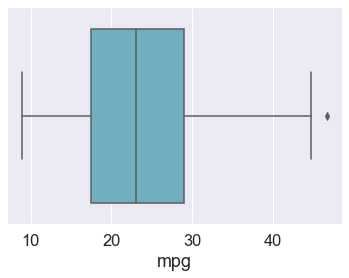

cylinders
[4.0, 4.0, 8.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


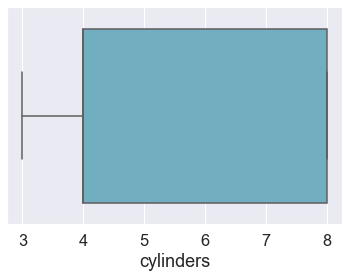

displacement
[102.5, 146.0, 264.5]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


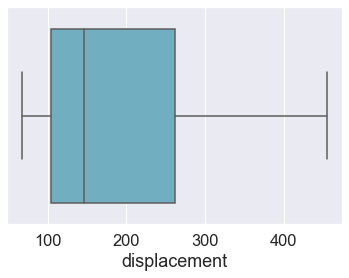

horsepower
[75.0, 92.0, 125.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


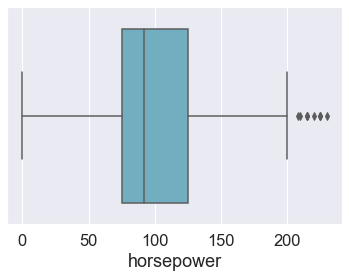

weight
[2221.5, 2800.0, 3611.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


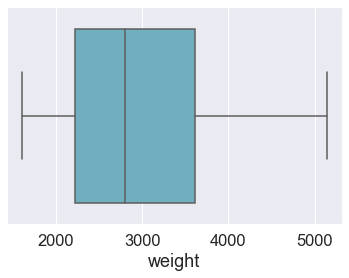

acceleration
[13.8, 15.5, 17.15]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


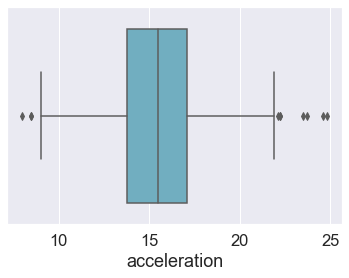

year
[73.0, 76.0, 79.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


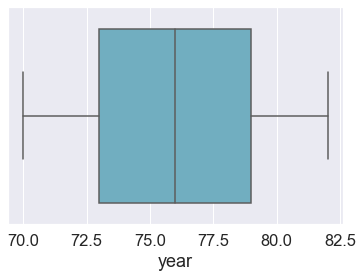

origin
[1.0, 1.0, 2.0]


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


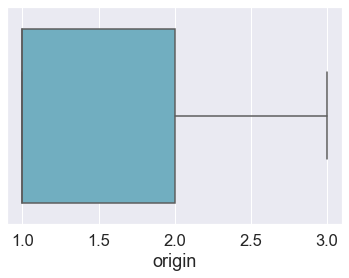

In [24]:
# Box plot showing Quantiles of each column
from statistics import quantiles
for col in df1 :
    print(col)
    print(quantiles(df1[col]))
    
    plt.figure()
    sns.boxplot(df1[col],color='c')
    plt.show()

# Spread of data, skewness and kurtosis

In [25]:
# Standerd deviation of each column
df1.std()

mpg               7.825804
cylinders         1.701577
displacement    104.379583
horsepower       39.986602
weight          847.904119
acceleration      2.749995
year              3.690005
origin            0.802549
dtype: float64

In [26]:
# Variance of each column
df1.var()

mpg                 61.243207
cylinders            2.895364
displacement     10895.097410
horsepower        1598.928352
weight          718941.395848
acceleration         7.562474
year                13.616136
origin               0.644086
dtype: float64

In [27]:
# Skewness of each column
df1.skew()

# Conclusion: As all the skew values are in between -1 to 1 range, so all the attributes have symmetric distribution.

mpg             0.456005
cylinders       0.522818
displacement    0.716282
horsepower      0.830476
weight          0.530989
acceleration    0.280818
year            0.013108
origin          0.919911
dtype: float64

mpg
0.4542802097749804


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


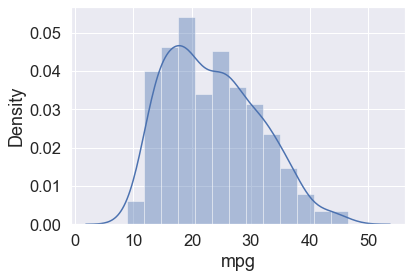

cylinders
0.5208409206068166


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


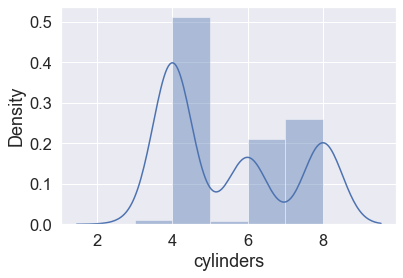

displacement
0.7135725537981151


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


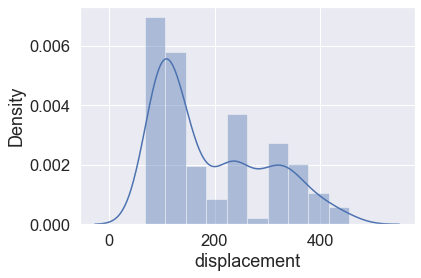

horsepower
0.8273351182201281


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


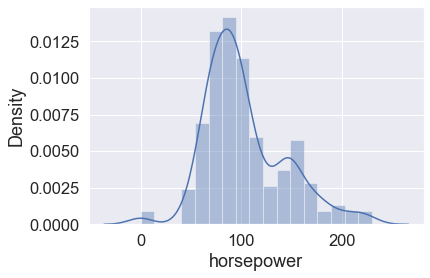

weight
0.5289806117823513


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


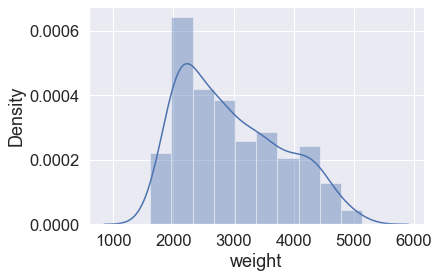

acceleration
0.2797553621826182


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


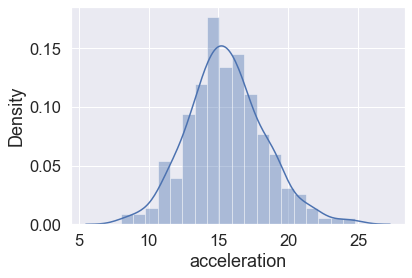

year
0.013058523739705464


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


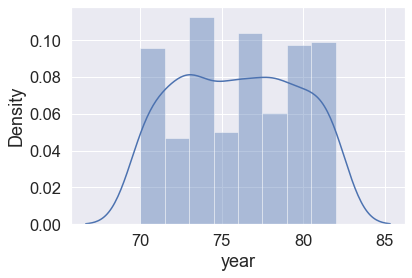

origin
0.916431949600784


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


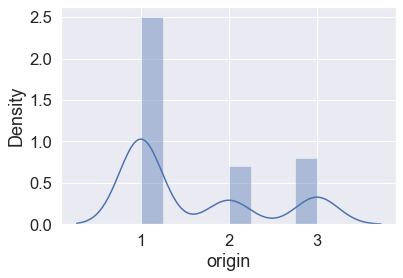

In [28]:
# density graph showing skewness for each column
from scipy.stats import skew
for col in df1 :
    print(col)
    print(skew(df1[col]))
    
    plt.figure()
    sns.distplot(df1[col])
    plt.show()

In [29]:
# Kurtosis of each column
df1.kurtosis()

mpg            -0.517322
cylinders      -1.380668
displacement   -0.753441
horsepower      0.831307
weight         -0.790660
acceleration    0.445525
year           -1.178955
origin         -0.824815
dtype: float64

mpg
-0.5259045302021703


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


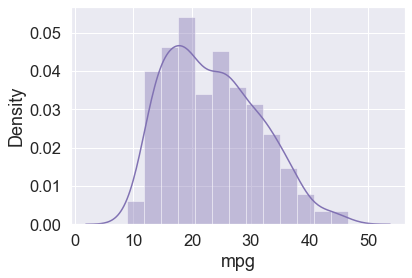

cylinders
-1.378416307895351


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


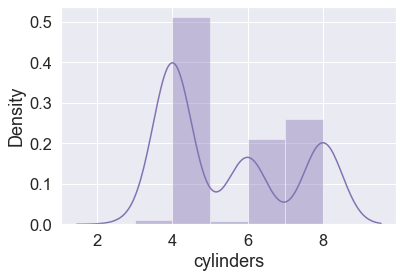

displacement
-0.7590608531573602


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


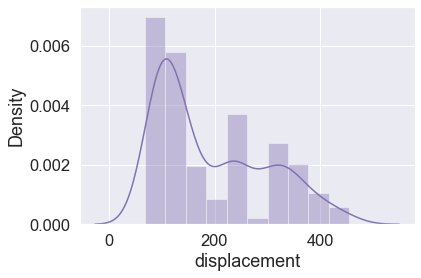

horsepower
0.8057987722029316


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


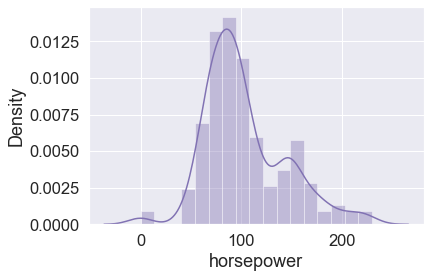

weight
-0.7958127858445345


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


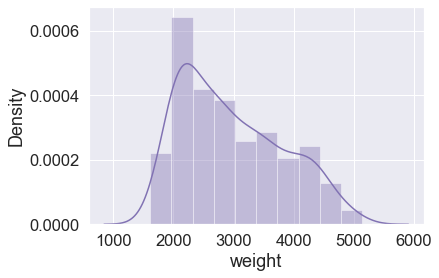

acceleration
0.42485848899846435


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


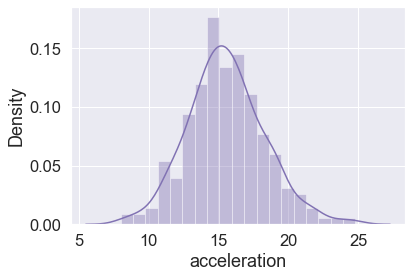

year
-1.1792339692919793


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


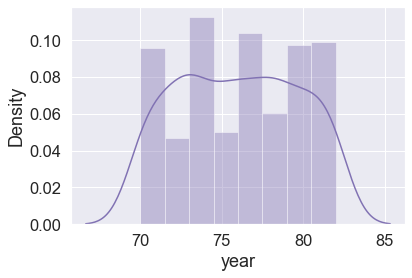

origin
-0.8295392062815128


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


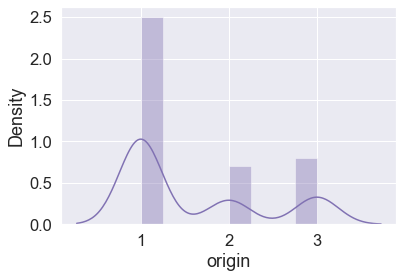

In [30]:
# density graph showing Kurtosis for each column
from scipy.stats import kurtosis
for col in df1 :
    print(col)
    print(kurtosis(df1[col]))
    
    plt.figure()
    sns.distplot(df1[col],color='m')
    plt.show()

# correlation

In [31]:
df1.corr()

# Conclusion:
# The diagonal of the above matirx shows the auto-correlation of the variables, which is always 1. 
# There is a strong -ve correlation between the displacement, hp, weight & no. of cylinders w.r.t mpg, that means, as any one of those variables increases, the mpg decreases.
# The displacement, hp, weight & cylinders have strong +ve correlation between themselves.
# The other variables, i.e. acceeration, origin, year are not highly correlated with each other.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


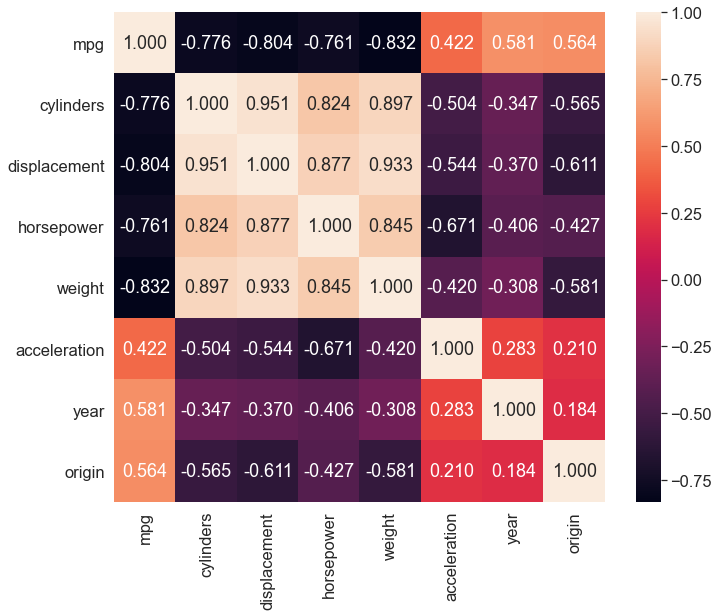

In [32]:
# Graphical representation of correlation
corr=df1.corr()
plt.figure(figsize=(11,9))
a= sns.heatmap(corr, annot=True , fmt='.3f')

# Conclusion: The points with light background colour represents the strong positive correlation.
# The points with dark background (almost black) colour represents the strong negative correlation.

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


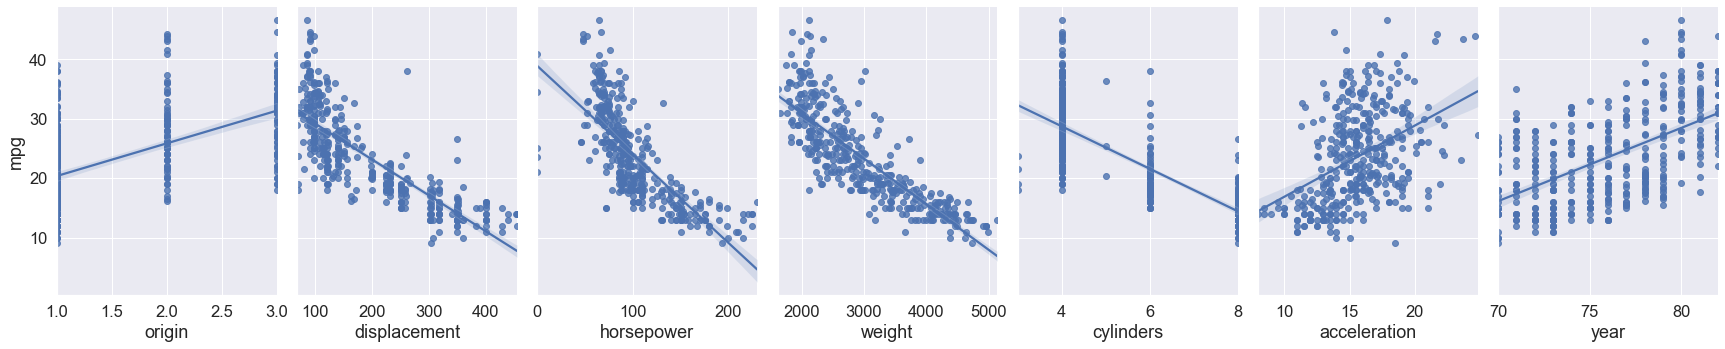

In [33]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df1, 
             x_vars=['origin', 'displacement', 'horsepower', 'weight', 'cylinders',
       'acceleration', 'year'], 
             y_vars='mpg', 
             size=5, 
             aspect=0.7, 
             kind='reg')

# Conclusion: From figure it is clear that displacement, hp, weight and no. of cylinders have strong negative correlation with response variable mpg.

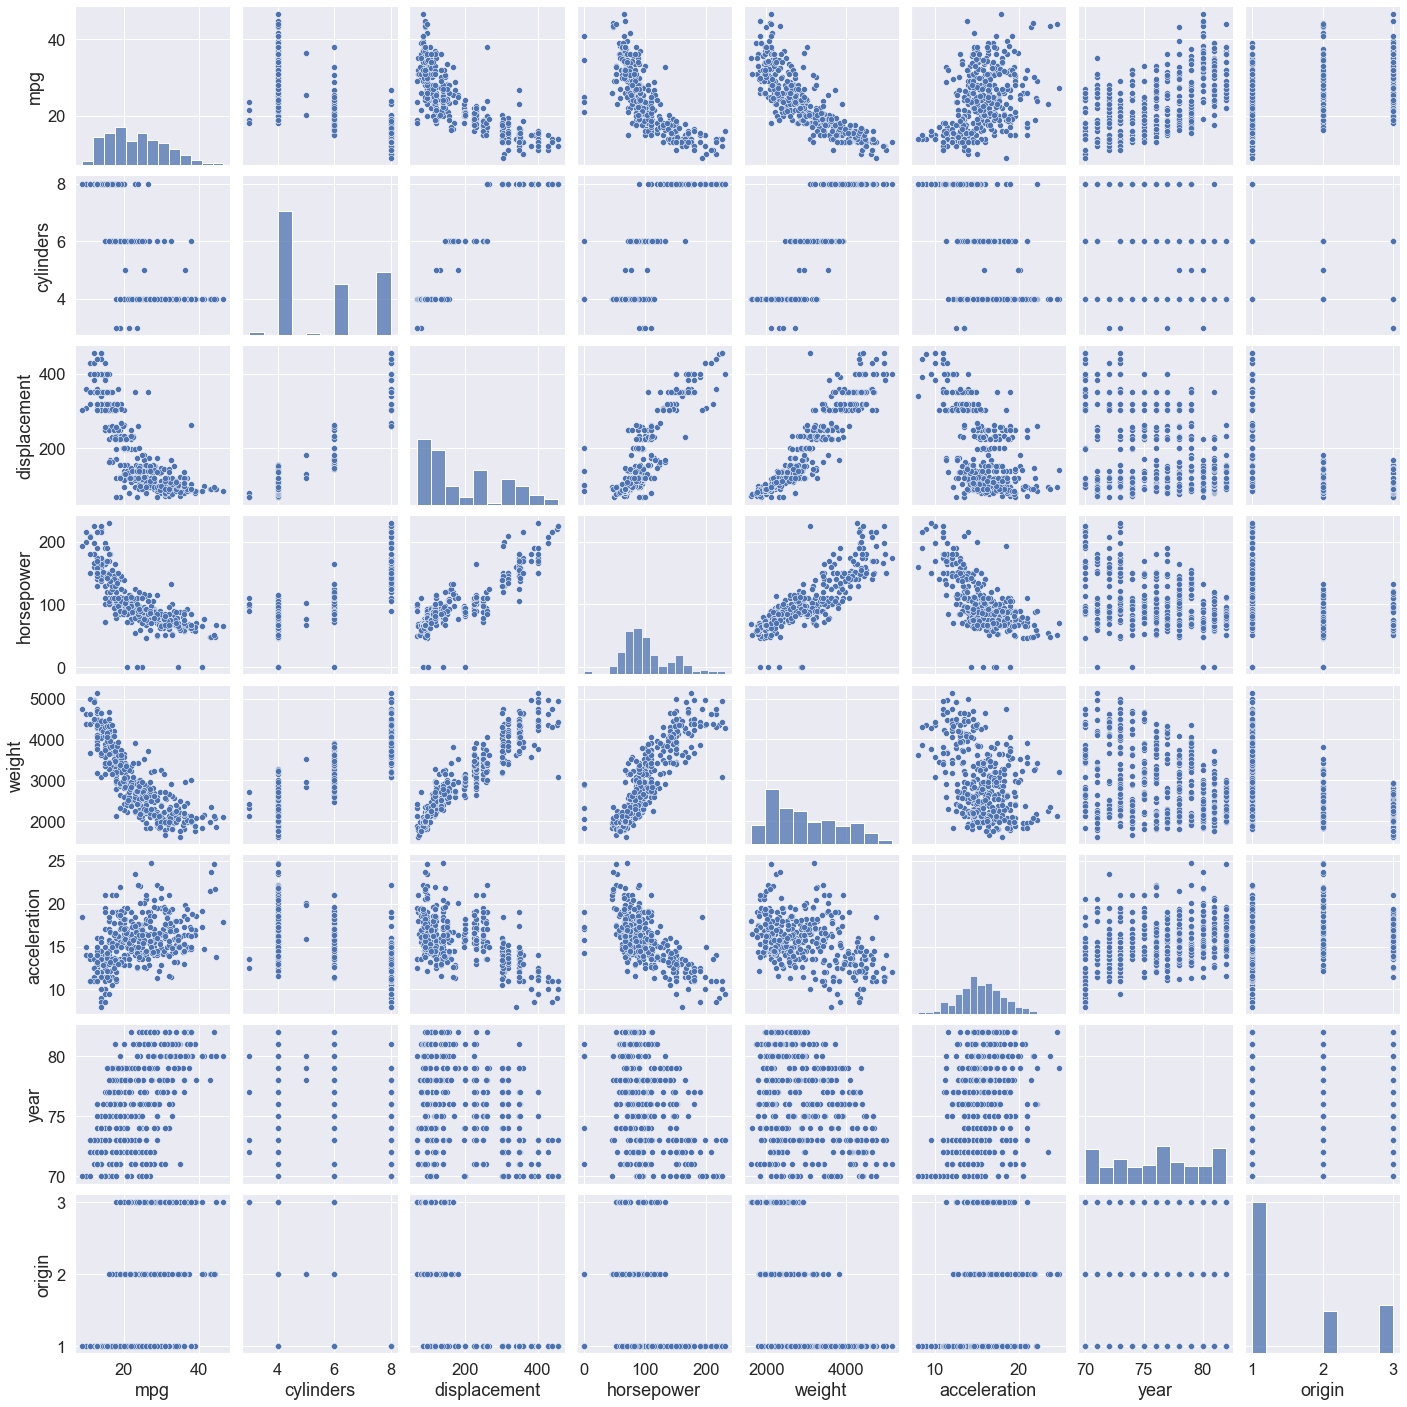

In [34]:
# multivariate plot
sns.pairplot(data=df1)
plt.show()

# linear regression

In [35]:
# create a Python list of feature names
feature_cols = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']

# use the list to select a subset of the original DataFrame
x = df1[feature_cols]

# select a Series from the DataFrame
y = df1['mpg']

In [36]:
# Splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.25)

In [37]:
# default split is 75% for training and 25% for testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(297, 7)
(297,)
(100, 7)
(100,)


In [38]:
# create a fitted model with all the features of the car
import statsmodels.formula.api as smf
sm_model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', 
              data=df1).fit()

In [39]:
# printing the co-efficients
sm_model.params

Intercept      -17.963954
cylinders       -0.463550
displacement     0.019984
horsepower      -0.014934
weight          -0.006604
acceleration     0.093932
year             0.757441
origin           1.445692
dtype: float64

In [40]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          1.28e-141
Time:                        08:40:33   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9640      4.449     -4.038      0.000     -26.712      -9.216
cylinders       -0.4636      0.322     -1.441      0.150      -1.096       0.169
displacement     0.0200      0.007      2.688      0.007       0.005       0.035
horsepower      -0.0149      0.011     -1.335      0.183      -0.037       0.007
weight          -0.0066      0.001    -10.544      0.000      -0.008      -0.005
acceleration     0.0939      0.091      1.027      0.305      -0.086       0.274
year             0.7574      0.050     15.083      0.000       0.659       0.856
origin           1.4457      0.277      5.218      0.000       0.901       1.990
==============================================================================
Omnibus:                       30.358   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.913
Skew:                           0.513   Prob(JB):                     2.39e-11
Kurtosis:                       4.379   Cond. No.                     8.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(x, y)

LinearRegression()

In [42]:
print(linreg.intercept_)

-17.963953564920317


In [43]:
# print the coefficients
print(linreg.coef_)

[-0.46355027  0.01998357 -0.01493407 -0.00660405  0.09393201  0.7574413
  1.44569239]


In [44]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('cylinders', -0.46355027222733686),
 ('displacement', 0.019983574971098622),
 ('horsepower', -0.014934067307075041),
 ('weight', -0.006604047775996366),
 ('acceleration', 0.09393201415300619),
 ('year', 0.7574413035600456),
 ('origin', 1.4456923899852572)]

# inferential statistics

In [45]:
# print the p-values for the model coefficients
sm_model.pvalues

Intercept       6.508286e-05
cylinders       1.503460e-01
displacement    7.493092e-03
horsepower      1.826922e-01
weight          4.969066e-23
acceleration    3.049915e-01
year            8.407655e-41
origin          2.952710e-07
dtype: float64

In [46]:
for i in sm_model.pvalues:
    print(i)
    if i < 0.05:
        print("Reject Null-Hypothesis H0\n")
    else:
        print("Accept Null-Hypothesis H0\n")

6.508286000101272e-05
Reject Null-Hypothesis H0

0.15034600118170763
Accept Null-Hypothesis H0

0.007493092085182281
Reject Null-Hypothesis H0

0.18269216608304864
Accept Null-Hypothesis H0

4.969065837326085e-23
Reject Null-Hypothesis H0

0.30499146117358156
Accept Null-Hypothesis H0

8.407654853385377e-41
Reject Null-Hypothesis H0

2.952710152041749e-07
Reject Null-Hypothesis H0



In [47]:
feature_cols_added_intercept = []
feature_cols_added_intercept = feature_cols.copy()
feature_cols_added_intercept.insert(0, 'Intercept')
feature_cols_added_intercept

['Intercept',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin']

In [48]:
list(zip(feature_cols_added_intercept, sm_model.pvalues))

[('Intercept', 6.508286000101272e-05),
 ('cylinders', 0.15034600118170763),
 ('displacement', 0.007493092085182281),
 ('horsepower', 0.18269216608304864),
 ('weight', 4.969065837326085e-23),
 ('acceleration', 0.30499146117358156),
 ('year', 8.407654853385377e-41),
 ('origin', 2.952710152041749e-07)]

In [49]:
for each in list(zip(feature_cols_added_intercept, sm_model.pvalues)):
    if each[1] <=0.05:
        print('REJECT the NULL hypothesis as the col {} has strong relationship with response variable'.format({each[0]}))

REJECT the NULL hypothesis as the col {'Intercept'} has strong relationship with response variable
REJECT the NULL hypothesis as the col {'displacement'} has strong relationship with response variable
REJECT the NULL hypothesis as the col {'weight'} has strong relationship with response variable
REJECT the NULL hypothesis as the col {'year'} has strong relationship with response variable
REJECT the NULL hypothesis as the col {'origin'} has strong relationship with response variable


In [50]:
### As Displacement, weight, year and origin features of the car have strong relationship with response variable mpg, so selecting these features for linear regression

# Implementing Model with selected features

In [51]:
sm_model_2 = smf.ols(formula='mpg ~  weight + displacement + year + origin', 
              data=df1).fit()

In [52]:
# print the coefficients
sm_model_2.params

Intercept      -18.840984
weight          -0.006657
displacement     0.006091
year             0.776452
origin           1.234539
dtype: float64

In [53]:
sm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     442.7
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.63e-144
Time:                        08:40:33   Log-Likelihood:                -1040.6
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     392   BIC:                             2111.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.8410      3.992     -4.720      0.000     -26.689     -10.993
weight          -0.0067      0.001    -11.980      0.000      -0.008      -0.006
displacement     0.0061      0.005      1.280      0.201      -0.003       0.015
year             0.7765      0.049     15.700      0.000       0.679       0.874
origin           1.2345      0.265      4.653      0.000       0.713       1.756
==============================================================================
Omnibus:                       36.606   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.756
Skew:                           0.548   Prob(JB):                     1.17e-15
Kurtosis:                       4.720   Cond. No.                     7.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  5. Interpreting metrices R2 score and Adjusted R2 score

In [54]:
# print the R-squared value for the model
sm_model.rsquared

0.8222108582454255

In [55]:
# print the R-squared value for the model_2
sm_model_2.rsquared

0.818769307934035

In [56]:
# Model evaluation metrices for regression
print('y_intercept           : ',linreg.intercept_)
print('Beta co-efficient     : ',linreg.coef_)
print('Mean Absolute error   : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean square error     : ',metrics.mean_squared_error(y_test,y_pred))
print('Root mean sqare error : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Value              : ',metrics.r2_score(y_test,y_pred))

y_intercept           :  -17.963953564920317
Beta co-efficient     :  [-0.46355027  0.01998357 -0.01493407 -0.00660405  0.09393201  0.7574413
  1.44569239]


NameError: name 'y_pred' is not defined

In [57]:
# statemodel with only selected features
sm_model_3=smf.ols(formula='mpg ~  weight + displacement + year + origin' ,
                data=df1).fit()

# print R-squred value
print('R Squared Value: ',sm_model_3.rsquared,'\nAdjusted R Squared Value: ',sm_model_3.rsquared_adj,'\n')


# statemodel with whole dataset 
sm_model_4=smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', 
              data=df1).fit()

# print R-squred value
print('R Squared Value: ',sm_model_4.rsquared,'\nAdjusted R Squared Value: ',sm_model_4.rsquared_adj)


R Squared Value:  0.818769307934035 
Adjusted R Squared Value:  0.8169200151578517 

R Squared Value:  0.8222108582454255 
Adjusted R Squared Value:  0.8190115677768341


In [58]:
# R-squared will always increase as you add more features to the model, even if they are unrelated to the response
# Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

#  6.  Diagnosing Multicolinearity

In [59]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


In [60]:
# The displacement, hp, weight & cylinders have strong +ve correlation between themselves.
# This violates the non-multicolinearity assumption of Linear regression.

In [61]:
# Checking for multicolinearity using variance inflaction factor.
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
x1=sm.tools.add_constant(df1)
series1=pd.Series([variance_inflation_factor(x1.values,i) for i in range (x1.shape[1])], index= x1.columns)
series1

const           738.734040
mpg               5.624640
cylinders        10.759099
displacement     21.910040
horsepower        7.182304
weight           12.956299
acceleration      2.265647
year              1.944204
origin            1.890171
dtype: float64

In [62]:
# We can observe that there is a problem of multicollinearity in given dataset, since some of the variables have vif grater than 5.
# Displacement, hp, weight and cylinders have strong +ve correlation between themselves and they cause multicollinearity.
# To avoid this, we can drop these features from dataset and again compute the vif of remaining factors and check if multicollinearity still exists.

In [63]:
# Dropping the columns with vif>5
df2= df1.drop(['cylinders','displacement','weight'],axis=1)
x2= sm.tools.add_constant(df2)
series2= pd.Series([variance_inflation_factor(x2.values,i) for i in range (x2.shape[1])], index= x2.columns)
series2

const           694.449799
mpg               3.916193
horsepower        3.728309
acceleration      1.906108
year              1.609876
origin            1.536895
dtype: float64

In [64]:
# So, the problem of multicollinearity is resolved, as the remaining variables have vif less than 5.

# Diagnosing Heteroscedasticity

In [65]:
Y =df1['mpg'] 
X = np.column_stack((df1['horsepower'], df1['acceleration'], df1['displacement'], df1['year'], df1['origin'], df1['weight'], df1['cylinders']))

In [66]:
import statsmodels.api as sm
X = sm.add_constant(X, prepend=True)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
results = sm.OLS(Y_train,X_train).fit()

In [67]:
import statsmodels.stats
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']

bp = statsmodels.stats.diagnostic.het_breuschpagan(results.resid, results.model.exog)
bp

pd.DataFrame(bp, name)

,0
Lagrange multiplier statistic,19.796018
p-value,0.006028
f-value,2.948344
f p-value,0.005346


In [68]:
# Asp-value is less than 0.05, this indicates that heteroscedasticity is present in the given data.

# Diagnosing Normality

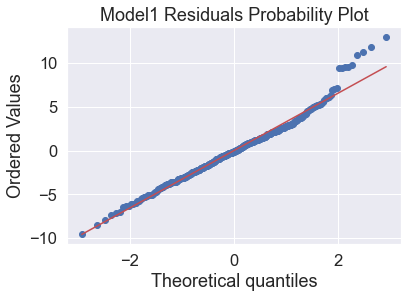

In [69]:
from scipy import stats
stats.probplot(sm_model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot");

In [70]:
# Kolmogorov-Smirnov test (for normality)
stats.kstest(sm_model.resid, 'norm')

KstestResult(statistic=0.26416883095562105, pvalue=6.097085698001785e-25)

In [72]:
# As the residuals which are represented as dots (in blue) fall on the red line. Thus, the plot indicates that the model’s residuals are normally distributed.
# Also, the pvalue is greater than 0.05, we fail to reject the null hupothesis, i.e. we assume that distribution of given data is normal/gaussian.